<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/day_18_principal_component_analysis_feature_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [ ]:
X, y = fetch_openml('mnist_784', version = 1, return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(X_train.shape, X_test.shape, y_train, y_test.shape)

(49000, 784) (21000, 784) ['9' '5' '4' ... '1' '8' '6'] (21000,)


# PCA Processed Data

In [ ]:
# Perform PCA to reduce dimensionality
n_components = 8 # 784 to 5 dimension
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Shape of PCA processed Data
X_train_pca.shape, X_test_pca.shape

((49000, 8), (21000, 8))

# Training

# K-Nearest Neighbors (KNN)

### Training KNN on Orignal Data

In [ ]:
knn_classifier_orig = KNeighborsClassifier(n_neighbors=3)
knn_classifier_orig.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Training KNN on PCA Data

In [ ]:
knn_classifier_pca = KNeighborsClassifier(n_neighbors=3)
knn_classifier_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicting KNN on Both Data

In [ ]:
# Making prediction using both classifier
y_knn_pred_orig = knn_classifier_orig.predict(X_test)
y_knn_pred_pca = knn_classifier_pca.predict(X_test_pca)

### Calculating Accuracy

In [ ]:
# Calculate accuracy on the test set
knn_accuracy_orig = accuracy_score(y_test, y_knn_pred_orig)
knn_accuracy_pca = accuracy_score(y_test, y_knn_pred_pca)

### Printing Accuracy of KNN

In [ ]:
print('KNN Accuracy Orignal :', knn_accuracy_orig)
print('KNN Accuracy PCA Data:', knn_accuracy_pca)

KNN Accuracy Orignal : 0.9693809523809523
KNN Accuracy PCA Data: 0.8942380952380953


# Decision Tree Classifier

### Training Decision Tree Classifier on Orignal Data

In [ ]:
# Train a Decision Tree Classifier Orignal dataset
dt_classifier_orig = DecisionTreeClassifier(max_depth=8)
dt_classifier_orig.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

### Training Decision Tree Classifier on PCA Data

In [ ]:
dt_classifier_pca = DecisionTreeClassifier(max_depth=8)
dt_classifier_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=8)

### Predicting Decision Tree on Both Data

In [ ]:
# Making prediction using both classifier
y_dt_pred_orig = dt_classifier_orig.predict(X_test)
y_dt_pred_pca = dt_classifier_pca.predict(X_test_pca)

### Calculating Accuracy

In [ ]:
# Calculate accuracy on the test set
dt_accuracy_orig = accuracy_score(y_test, y_dt_pred_orig)
dt_accuracy_pca = accuracy_score(y_test, y_dt_pred_pca)

### Printing Accuracy of Decision Tree Classifier

In [ ]:
print('DSTree Accuracy Orignal :', dt_accuracy_orig)
print('DSTree Accuracy PCA Data:', dt_accuracy_pca)

DSTree Accuracy Orignal : 0.8195714285714286
DSTree Accuracy PCA Data: 0.7188095238095238


# Random Forest Classifier

### Training Random Forest Classifier on Orignal Data

In [ ]:
# Training Random Forest Classifier Orignal dataset
rf_classifier_orig = RandomForestClassifier(random_state=42)
rf_classifier_orig.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Training Random Forest Classifier on PCA Data

In [ ]:
rf_classifier_pca = RandomForestClassifier(random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

### Predicting Decision Tree on Both Data

In [ ]:
# Making prediction using both classifier
y_rf_pred_orig = rf_classifier_orig.predict(X_test)
y_rf_pred_pca = rf_classifier_pca.predict(X_test_pca)

### Calculating Accuracy

In [ ]:
# Calculate accuracy on the test set
rf_accuracy_orig = accuracy_score(y_test, y_rf_pred_orig)
rf_accuracy_pca = accuracy_score(y_test, y_rf_pred_pca)

### Printing Accuracy of Random Forest Classifier

In [ ]:
print('RFClassifier Accuracy Orignal :', dt_accuracy_orig)
print('RFClassifier Accuracy PCA Data:', dt_accuracy_pca)

RFClassifier Accuracy Orignal : 0.8195714285714286
RFClassifier Accuracy PCA Data: 0.7188095238095238


# Logistic Regression

### Training Logistic Regression on Orignal Data

### Training Logistic on Orignal Data

In [ ]:
# Training Logistic Regression Orignal dataset
lr_classifier_orig = LogisticRegression(random_state=42)
lr_classifier_orig.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Training Logistic on PCA Data

In [ ]:
lr_classifier_pca = LogisticRegression(random_state=42)
lr_classifier_pca.fit(X_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Predicting Logistic on Both Data

In [ ]:
# Making prediction using both classifier
y_lr_pred_orig = lr_classifier_orig.predict(X_test)
y_lr_pred_pca = lr_classifier_pca.predict(X_test_pca)

### Calculating Accuracy on Both Data

In [ ]:
# Calculate accuracy on the test set
lr_accuracy_orig = accuracy_score(y_test, y_lr_pred_orig)
lr_accuracy_pca = accuracy_score(y_test, y_lr_pred_pca)

### Printing Accuracy

In [ ]:
print('Logistic Regression Accuracy Orignal :', lr_accuracy_orig)
print('Logistic Regression Accuracy PCA Data:', lr_accuracy_pca)

Logistic Regression Accuracy Orignal : 0.9181428571428571
Logistic Regression Accuracy PCA Data: 0.7821904761904762


# Accuracy Comparison

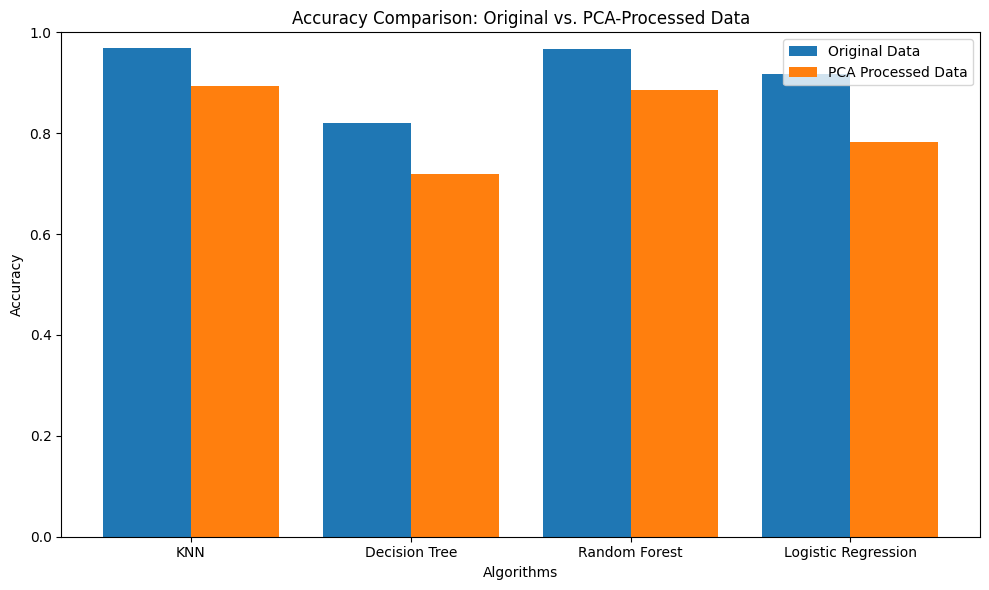

In [ ]:
import matplotlib.pyplot as plt

# List of algorithm names
algorithms = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']

# List of accuracy scores for original and PCA-processed datasets
original_accuracies = [knn_accuracy_orig, dt_accuracy_orig, rf_accuracy_orig, lr_accuracy_orig]
pca_accuracies = [knn_accuracy_pca, dt_accuracy_pca, rf_accuracy_pca, lr_accuracy_pca]

# Set the positions for the bars
x = range(len(algorithms))

# Plot the bar plots
plt.figure(figsize=(10, 6))

plt.bar(x, original_accuracies, width=0.4, label='Original Data')
plt.bar([pos + 0.4 for pos in x], pca_accuracies, width=0.4, label='PCA Processed Data')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Original vs. PCA-Processed Data')
plt.xticks([pos + 0.2 for pos in x], algorithms)
plt.ylim(0, 1)  # Set the y-axis limit to better visualize the differences
plt.legend()

plt.tight_layout()
plt.show()
